In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [51]:
df = pd.read_csv('/content/spam.csv', encoding = 'LATIN-1')


In [52]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [54]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [55]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [56]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [57]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [59]:
df.duplicated().sum()

403

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
df.shape

(5169, 2)

**EDA**

In [63]:
df.value_counts('target')

target
0    4516
1     653
Name: count, dtype: int64

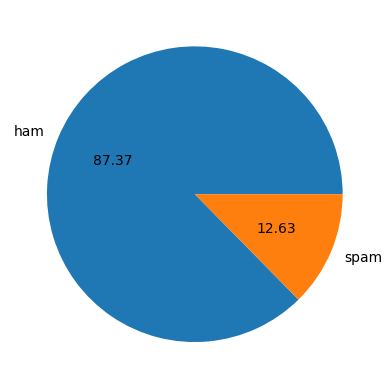

In [64]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [65]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
df['num_characters']=df['text'].apply(len)

In [67]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [68]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_characters', ylabel='Count'>

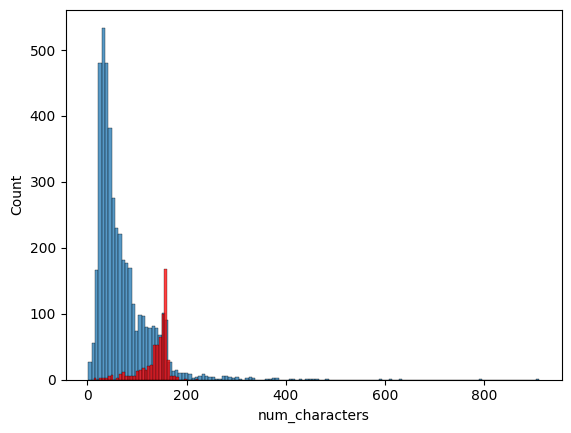

In [70]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

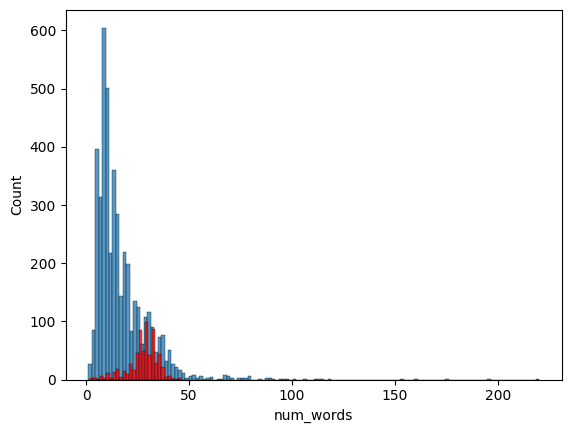

In [71]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

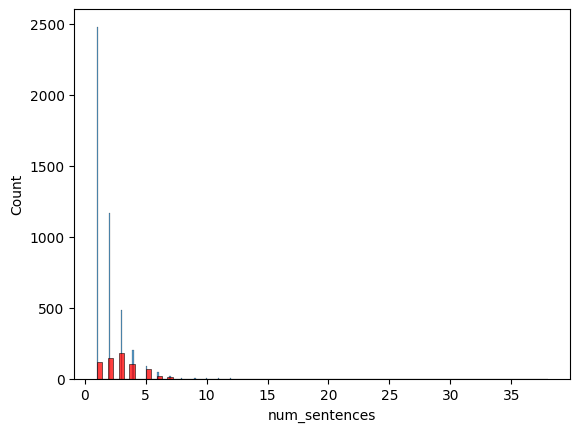

In [72]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

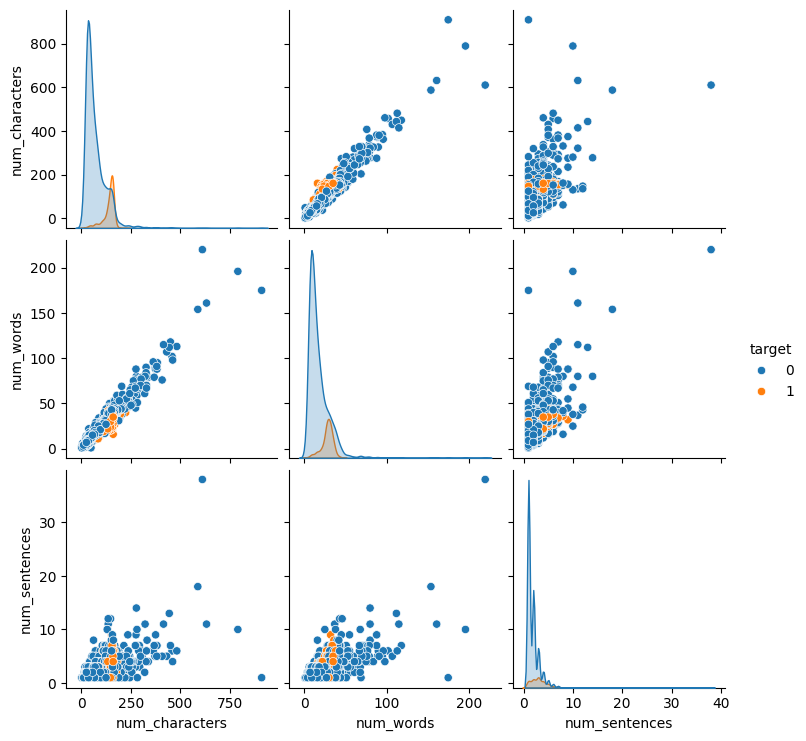

In [73]:
sns.pairplot(df,hue='target')

<Axes: >

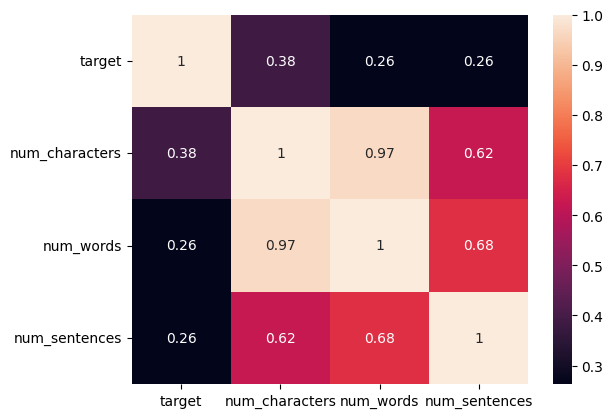

In [74]:
df_numeric = df.select_dtypes(exclude=['object'])
sns.heatmap(df_numeric.corr(),annot=True)

**3. DATA TRANSFORMATION**

In [75]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string
from nltk.corpus import stopwords
stopwords.words('english')
def transform_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
      if i .isalnum():
        y.append(i)
    text=y[:]
    y.clear()

    for i in text:
      if i not in stopwords .words('english') and i not in string.punctuation:
        y.append(i)
    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

In [77]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [78]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [79]:
df['transformed_text']=df['text'].apply(transform_text)

MAKING A WORD CLOUD
DISPLAYS THE WORDS FROM THE TRANSFORMED TEXT THAT ARE USED,BIGGER THE FONT SIZE MORE THE WORDS ARE USED AND VICE VERSA

In [80]:
from wordcloud import WordCloud # Import the WordCloud class
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [81]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

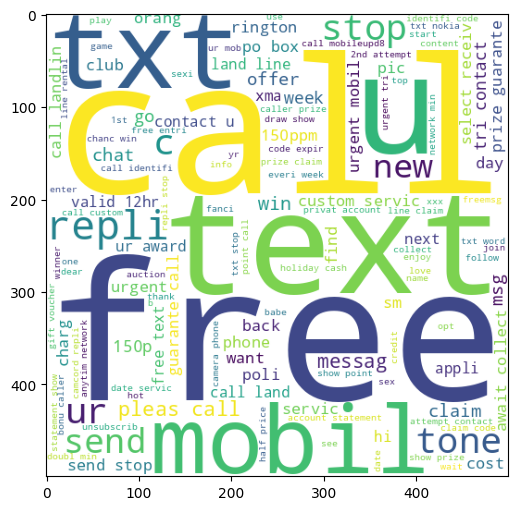

In [82]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [83]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

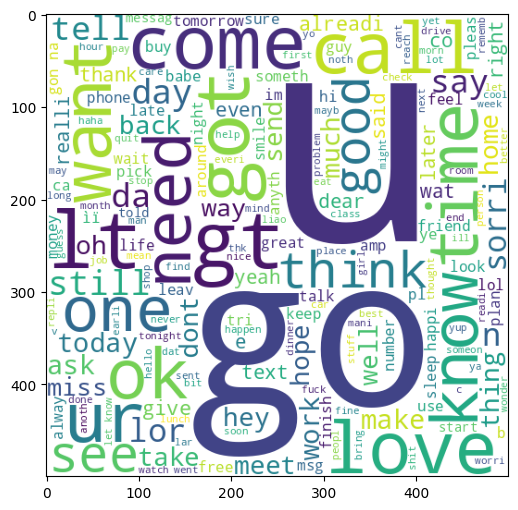

In [84]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

TOTAL WORDS IN SPAM MESSAGE AND TOP 30 MOST OCCURING WORDS

In [85]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

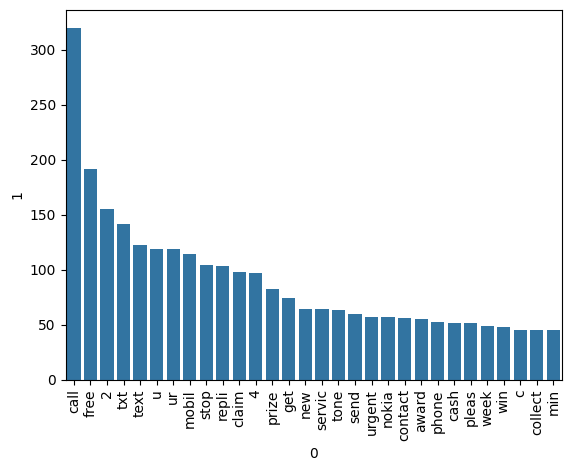

In [86]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [87]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [88]:
len(ham_corpus)

35404

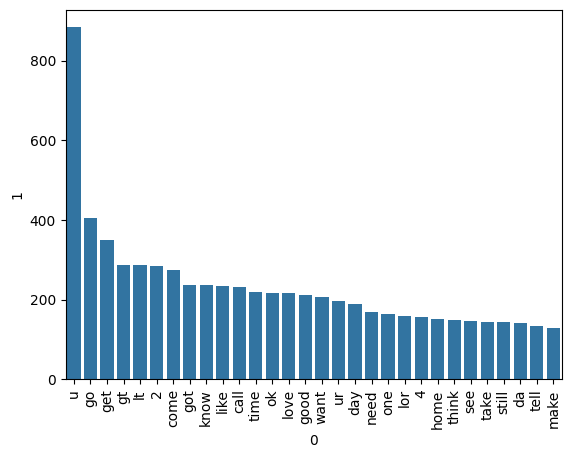

In [89]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. MODEL BUILDING

  USING NAIVE BAISE MODEL

In [90]:
# converting the transformed text to numerical data

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

X =tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

y=df['target'].values

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [93]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


MULTINOMIAL NB GIVES THE BEST RESULT AS THE PRECISION SCORE MATTER HERE

In [94]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622823984526112
[[896   0]
 [ 39  99]]
1.0


In [95]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


COMPARING WITH OTHER ML MODEL

In [96]:
# RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print("Random Forest Accuracy:", accuracy_rfc)
print("Random Forest Precision:", precision_rfc)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rfc)


Random Forest Accuracy: 0.9729206963249516
Random Forest Precision: 0.9824561403508771
Random Forest Confusion Matrix:
 [[894   2]
 [ 26 112]]


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))